# **Flat-earth experiment** 

#### **Author:** Torsten Auerswald &emsp; **Updated:** 01/08/2025
#### (based on the notebook by Reinhard Schiemann)

In this experiment, all of the orography in the SpeedyWeather model has been flattened to zero. What will the effects of this be, on the atmospheric circulation, the global energy budget and the water cycle?

Some background reading and ideas for analysis, with a focus on the atmosphere, are provided in this document:

In [60]:
## needs to be updated to SpeedyWeather

from IPython.display import IFrame
IFrame("./CMSS15_labnotes_FlatEarth.pdf", width=1000, height=600)
        

## Simulation

To produce the results for the analysis below, run SpeedyWeather as shown in the notebook "Flat_Earth.ipynb" (for the flat earth experiment) and "Example_SpeedyLongClimate.ipynb" (for the control run with realistic orography).

## Orography

Let's make some initial plots. We will start by comparing the orographic height in the control experiment with the flat earth experiment. The output file of each run contains a variable called 'orography'.

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import sys

In [7]:
datadir='/gws/nopw/j04/hrcm/torau/summerschool_2025'

In [8]:
ds=xr.open_dataset(f'{datadir}/run_Climate_Ocean_Land_0001/output.nc')
ds

<xarray.Dataset> Size: 102GB
Dimensions:           (time: 87601, lon: 96, lat: 48, layer: 8, soil_layer: 2)
Coordinates:
  * time              (time) datetime64[ns] 701kB 2000-01-01 ... 2029-12-24
  * lon               (lon) float64 768B 0.0 3.75 7.5 ... 348.8 352.5 356.2
  * lat               (lat) float64 384B 87.16 83.48 79.78 ... -83.48 -87.16
  * layer             (layer) float32 32B 0.0625 0.1875 0.3125 ... 0.8125 0.9375
  * soil_layer        (soil_layer) int64 16B 1 2
Data variables: (12/28)
    sma               (time, lat, lon) float32 2GB ...
    random_pattern    (time, lat, lon) float32 2GB ...
    sru               (time, lat, lon) float32 2GB ...
    ef                (time, lat, lon) float32 2GB ...
    lsm               (lat, lon) float32 18kB ...
    st                (time, soil_layer, lat, lon) float32 3GB ...
    ...                ...
    sst               (time, lat, lon) float32 2GB ...
    lru               (time, lat, lon) float32 2GB ...
    precip_conv       (time, lat, lon) float32 2GB ...
    roff              (time, lat, lon) float32 2GB ...
    precip_cond_rate  (time, lat, lon) float32 2GB ...
    precip_conv_rate  (time, lat, lon) float32 2GB ...

In [9]:
ds_flat=xr.open_dataset(f'{datadir}/run_Flat_Earth_0001/output.nc')
ds_flat

<xarray.Dataset> Size: 102GB
Dimensions:           (time: 87601, lon: 96, lat: 48, layer: 8, soil_layer: 2)
Coordinates:
  * time              (time) datetime64[ns] 701kB 2000-01-01 ... 2029-12-24
  * lon               (lon) float64 768B 0.0 3.75 7.5 ... 348.8 352.5 356.2
  * lat               (lat) float64 384B 87.16 83.48 79.78 ... -83.48 -87.16
  * layer             (layer) float32 32B 0.0625 0.1875 0.3125 ... 0.8125 0.9375
  * soil_layer        (soil_layer) int64 16B 1 2
Data variables: (12/28)
    sma               (time, lat, lon) float32 2GB ...
    random_pattern    (time, lat, lon) float32 2GB ...
    sru               (time, lat, lon) float32 2GB ...
    ef                (time, lat, lon) float32 2GB ...
    lsm               (lat, lon) float32 18kB ...
    st                (time, soil_layer, lat, lon) float32 3GB ...
    ...                ...
    sst               (time, lat, lon) float32 2GB ...
    lru               (time, lat, lon) float32 2GB ...
    precip_conv       (time, lat, lon) float32 2GB ...
    roff              (time, lat, lon) float32 2GB ...
    precip_cond_rate  (time, lat, lon) float32 2GB ...
    precip_conv_rate  (time, lat, lon) float32 2GB ...

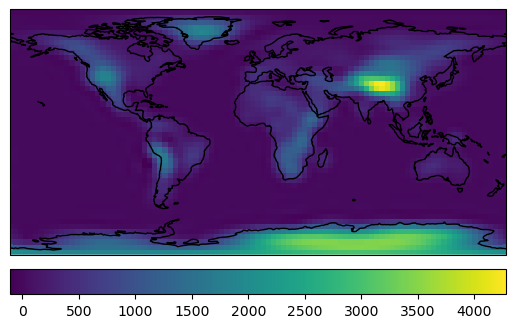

In [10]:
ax=plt.axes(projection=ccrs.PlateCarree())
plt.pcolormesh(ds.lon,ds.lat,ds.orography,transform=ccrs.PlateCarree())
plt.colorbar(orientation='horizontal', pad=0.04)
ax.coastlines()

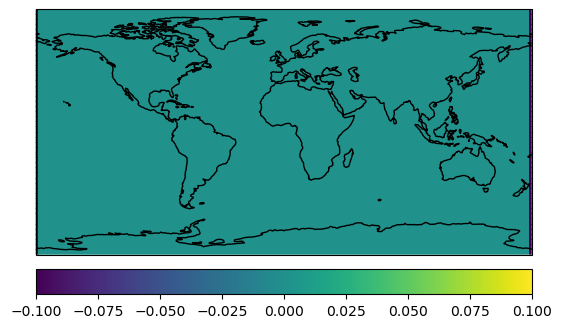

In [11]:
ax=plt.axes(projection=ccrs.PlateCarree())
plt.pcolormesh(ds_flat.lon,ds_flat.lat,ds_flat.orography,transform=ccrs.PlateCarree())
plt.colorbar(orientation='horizontal', pad=0.04)
ax.coastlines()

As was expected the surface height in the flat earth experiment is zero everywhere.

## Lowest level air temperature

Let's have a look at some model output, say the 30-year mean temperature at the lowest level in the control and flat-earth experiments. Note that this is not the 2m-temperature. It is the temperature at the sigma level closest to the surface. In a simulation with 8 sigma levels this corresponds to a pressure level of 0.9375 times surface pressure (937.5 hPa if the surface pressure is 1000 hPa). An alternative would be to plot the top layer of the soil temperature and the SSTs.

In [12]:
#sigma vertical levels are indexed top to bottom. So the first index corresponds to the top of the atmosphere 
#and the last index to the layer closest to the surface.

#Averageing over the whole 30 year period
Tflat_mean=ds_flat.temp[:,7,:,:].mean(axis=0)
T_mean=ds.temp[:,7,:,:].mean(axis=0)

Text(0.5, 1.0, 'Mean temperature at sigma=0.9375, Flat Earth')

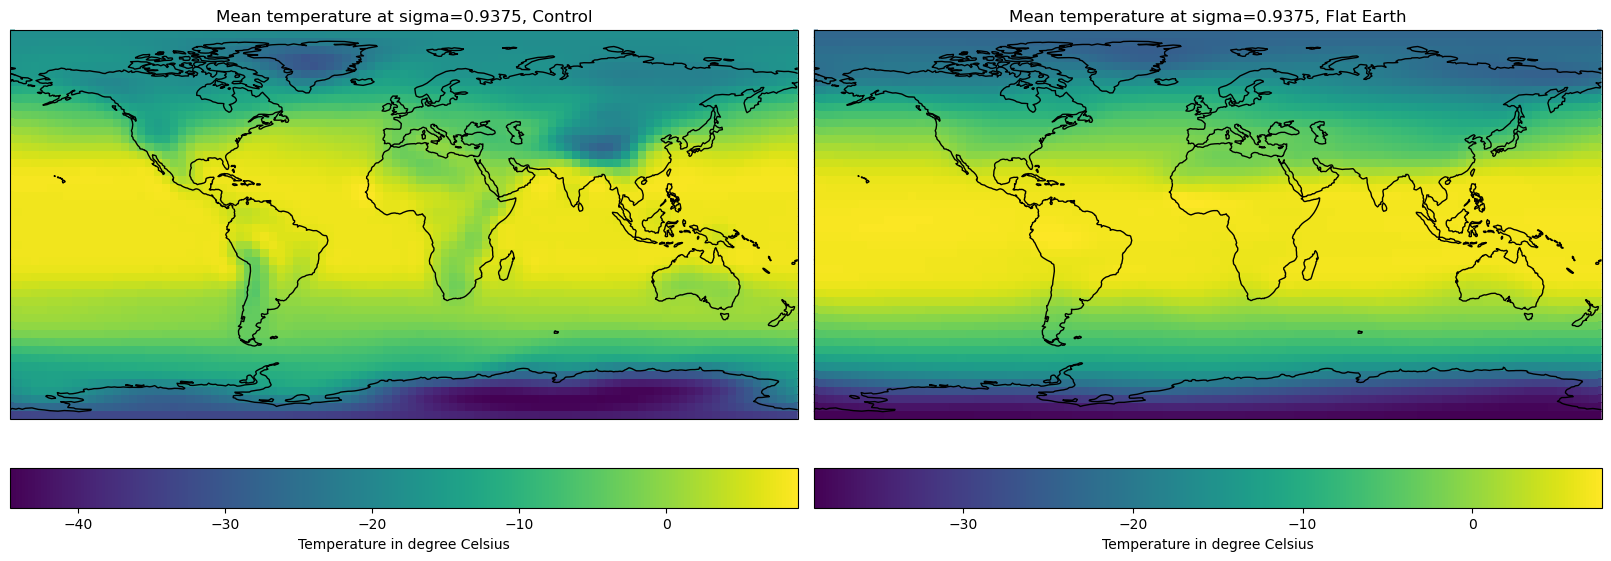

In [15]:
proj = ccrs.PlateCarree()
fig, (ax_ctrl, ax_flat) = plt.subplots(1,2,figsize=(16, 12),constrained_layout=True,subplot_kw={'projection': proj})


csc=ax_ctrl.pcolormesh(ds.lon,ds.lat,T_mean)
fig.colorbar(csc,ax=ax_ctrl,orientation='horizontal', pad=0.04, label='Temperature in degree Celsius')
ax_ctrl.coastlines()
ax_ctrl.set_title('Mean temperature at sigma=0.9375, Control')

csf=ax_flat.pcolormesh(ds_flat.lon,ds_flat.lat,Tflat_mean)
fig.colorbar(csf,ax=ax_flat,orientation='horizontal', pad=0.04, label='Temperature in degree Celsius')
ax_flat.coastlines()
ax_flat.set_title('Mean temperature at sigma=0.9375, Flat Earth')

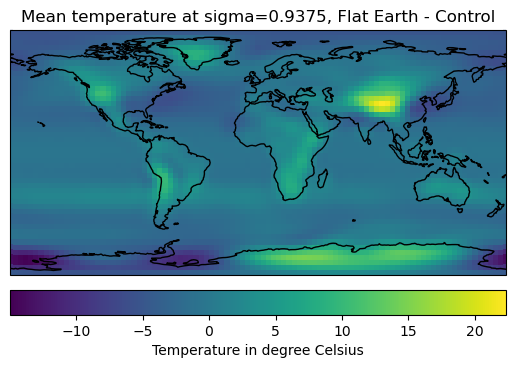

In [17]:
#mean temperature flat-control
ax=plt.axes(projection=ccrs.PlateCarree())
plt.pcolormesh(ds_flat.lon,ds_flat.lat,Tflat_mean-T_mean,transform=ccrs.PlateCarree(), label='')
plt.colorbar(orientation='horizontal', pad=0.04, label='Temperature in degree Celsius')
ax.set_title('Mean temperature at sigma=0.9375, Flat Earth - Control')
ax.coastlines()

Can you explain the different areas of warming and cooling in the flat-earth experiment? The international standard atmosphere has a lapse rate of about -6.5 °C/km. How much of the temperature differences can simply be explained by this lapse-rate effect?

Now plot the time series of annual-mean temperature. To do that, we need to calculate the global mean temperature for each year, weighted by the area of each grid box.

In [19]:
#Annual mean temperature
ds_temp=ds.temp[:,7,:,:].resample(time='1YE').mean('time')
ds_temp_flat=ds_flat.temp[:,7,:,:].resample(time='1YE').mean('time')

To calculate the area weighted mean we are using iris. So we have to first convert the xarray data to an iris cube.

In [20]:
import iris
ids_temp=ds_temp.to_iris()
if not ids_temp.coord('longitude').has_bounds():
    ids_temp.coord('longitude').guess_bounds()
if not ids_temp.coord('latitude').has_bounds():    
    ids_temp.coord('latitude').guess_bounds()

ids_temp_flat=ds_temp_flat.to_iris()
if not ids_temp_flat.coord('longitude').has_bounds():
    ids_temp_flat.coord('longitude').guess_bounds()
if not ids_temp_flat.coord('latitude').has_bounds():    
    ids_temp_flat.coord('latitude').guess_bounds()

Then we calculate the area weights and the mean.

In [21]:

areas = iris.analysis.cartography.area_weights(ids_temp)

ids_temp_mean = ids_temp.collapsed(['longitude','latitude'],
                                        iris.analysis.MEAN,
                                        weights=areas)

ids_temp_flat_mean = ids_temp_flat.collapsed(['longitude','latitude'],
                                        iris.analysis.MEAN,
                                        weights=areas)

/opt/jaspy/lib/python3.12/site-packages/iris/analysis/cartography.py:435: IrisDefaultingWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn(


Now we convert the data back from iris cube to xarray data array.

In [22]:
ds_temp_mean=xr.DataArray.from_iris(ids_temp_mean)
ds_temp_flat_mean=xr.DataArray.from_iris(ids_temp_flat_mean)

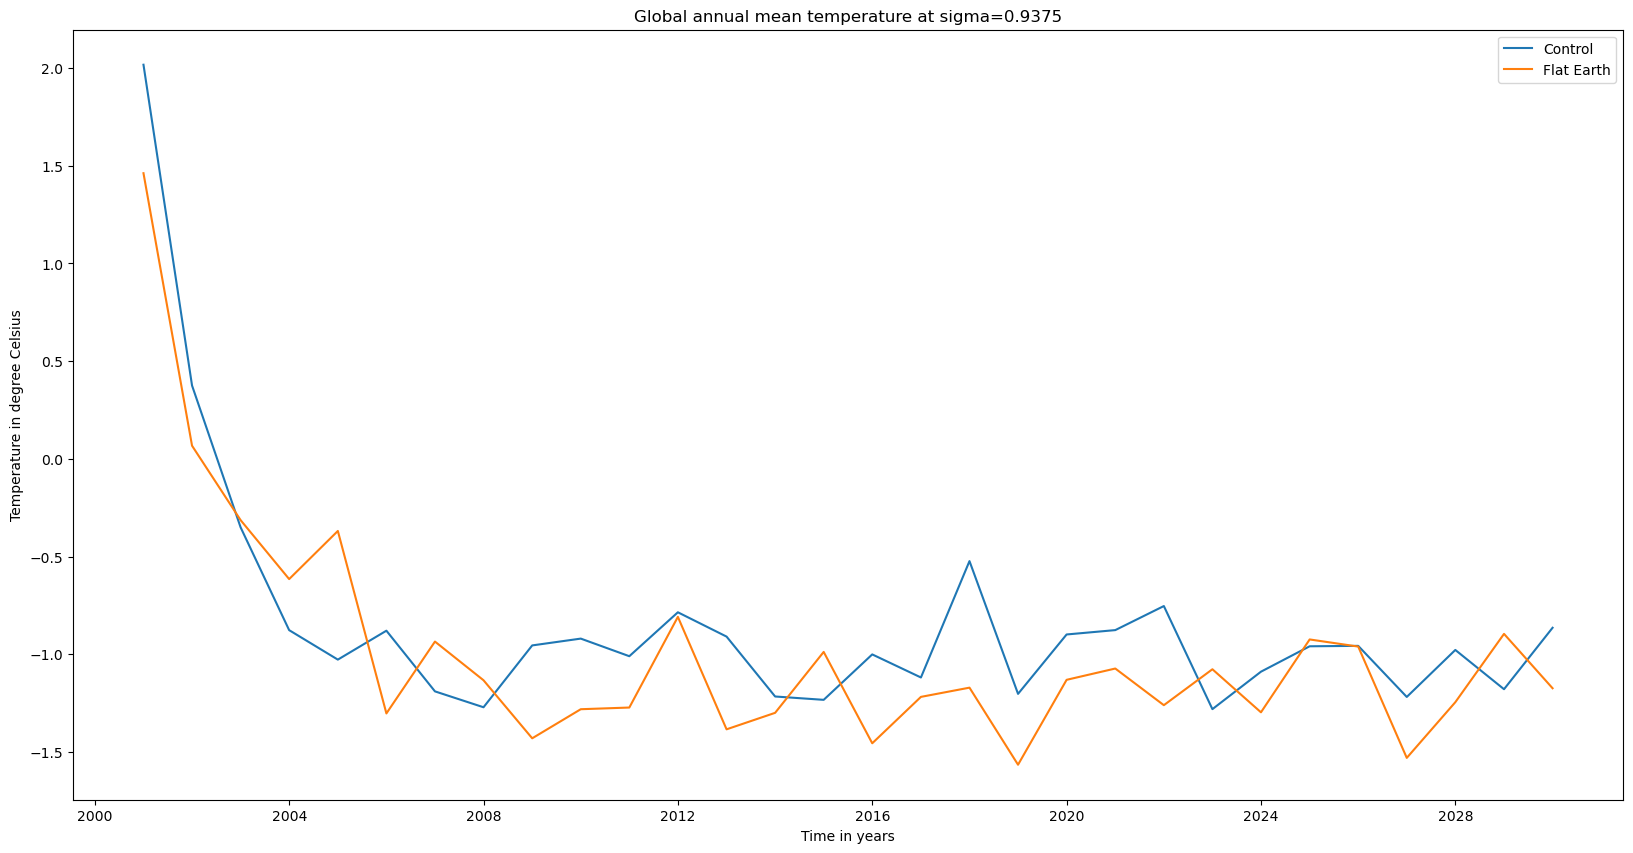

In [26]:
#Plot annual mean temperature
plt.figure(figsize=(20,10))

ax=plt.axes()

plt.plot(ds_temp_mean.time,ds_temp_mean.data,label="Control")
plt.plot(ds_temp_flat_mean.time,ds_temp_flat_mean.data,label="Flat Earth")
ax.set_title('Global annual mean temperature at sigma=0.9375')
ax.set_xlabel('Time in years')
ax.set_ylabel('Temperature in degree Celsius')

plt.legend()


You can do the same analysis for the uppermost soil layer and SSTs by calculating a global surface temperature field, using the land-sea mask, in the following way:

In [ ]:
T=ds.st[:,0,:,:]*ds.lsm+ds.sst*(1-ds.lsm)
T_flat=ds_flat.st[:,0,:,:]*ds_flat.lsm+ds_flat.sst*(1-ds_flat.lsm)

## Ideas for analysis

* Can you explain the evolution of the global-mean temparature as seen in the previous section?
* Other ideas for analysis of atmospheric processes are given in the pdf above. One example is the Asian monsoon.
* How are the different components of the Earth system impacted in the sensitivity experiment? I.e., in addition to the atmosphere, the ocean, land, and sea ice? Are there any feedbacks?
* Do you see changes in the global energy and water budgets?